# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 05

**Author 1 (sciper):** Lavinia Schlyter (284566)
**Author 2 (sciper):** Simon Gilgien (253797)
**Author 3 (sciper):** Cengizhan Bektas (350828)

**Release date:** 25.03.2022  
**Due date:** 08.04.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

In [2]:
# import additionnal libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import skimage.io

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

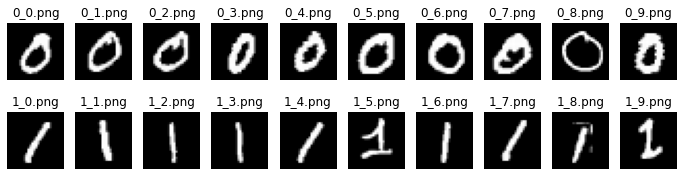

In [3]:
def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

Text(0.5, 1.0, 'Features for the original images')

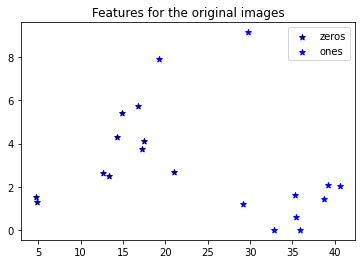

In [18]:
# Add your implementation and discussion

def interpolate_contour(contour, length):
    """Given a contour, interpolate a contour of a given length"""
    if len(contour) == 1:
        return [contour[0] for x in range(length)]
    
    new_contour = []
    for i in range(length):
        index = i*len(contour)/length
        
        k = index - int(index)
        index = int(index)
        
        if index == len(contour) - 1:
            new_contour.append(contour[-1] * (1-k) + contour[0] * k)
            
        else:
            new_contour.append(contour[index] * (1-k) + contour[index+1] * k)
            
    return new_contour
        
    

def fourier_features(img, show_contour=False):
    # thresholding
    img = (img > 50).astype(np.uint8)
    
    # closing
    #img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((2, 2)))
    #img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((2, 2)))
    
    # extract contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # take the longest contour
    contour = max(contours, key=lambda c: len(c))
    
    contour = [x[0][0]+x[0][1]*1j for x in contour]
    
    # interpolate to a fixed lenght
    contour = interpolate_contour(contour, 10)
    
    # take the fourier transform
    fourier_transform = np.fft.fft(contour)
    
    # return the magnitude of the second and third terms
    return (abs(x) for x in fourier_transform[1:3])
    #return (abs(fourier_transform[2])/abs(fourier_transform[1]), abs(fourier_transform[1]))
    return (abs(x)/abs(fourier_transform[1]) for x in fourier_transform[2:4])

# Plot results

X = []
Y = []
for im in zeros_im:
    x, y = fourier_features(im)
    X.append(x)
    Y.append(y)
    
plt.scatter(X, Y, marker='*', color='darkblue')

X = []
Y = []
for im in ones_im:
    x, y = fourier_features(im)
    X.append(x)
    Y.append(y)
    
plt.scatter(X, Y, marker='*', color='gold')
plt.legend(["zeros", "ones"])
plt.title("Features for the original images")

**Translation**

We use a translation of (3, 2) pixels in the (x, y) directions.

**Rotation**

We use a rotation of 30° centered on the center of the image.

**Scaling**

We use a scaling factor of 0.6 centered on the center of the image.

Text(0.5, 1.0, 'Features for the scaled images')

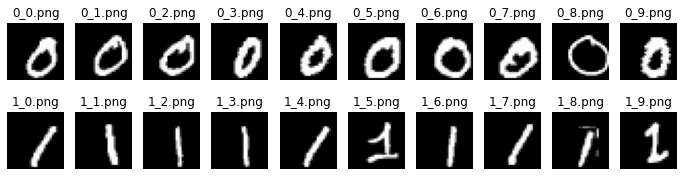

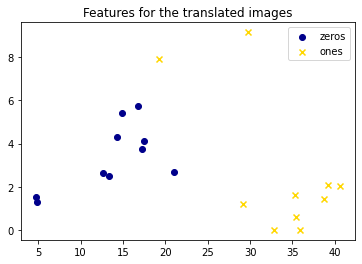

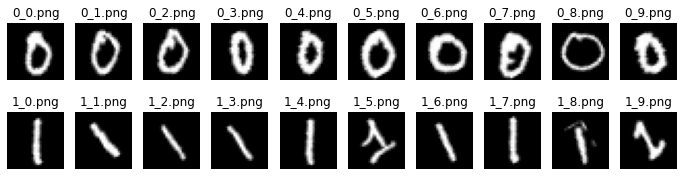

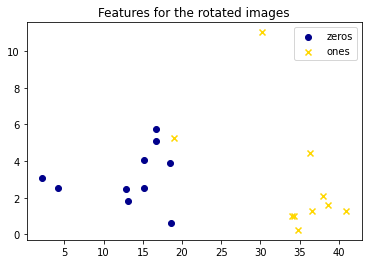

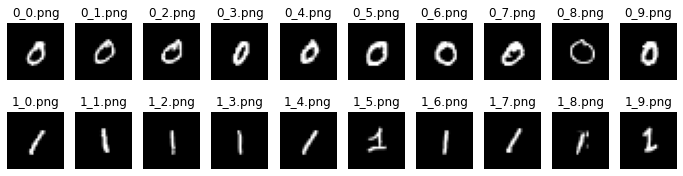

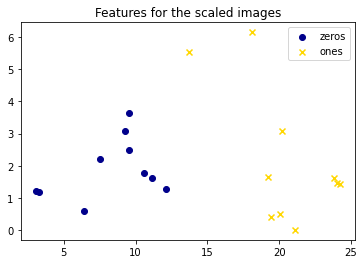

In [20]:
# translate the image by a translation vector [3, 2]
def translate(img):
    T = np.float32([[1, 0, 3], [0, 1, 2]])
    return cv2.warpAffine(im, T, im.shape)

# Rotate the image by 30 degrees counter-clockwise
def rotate(img):
    x, y = img.shape
    angle = 30
    T = cv2.getRotationMatrix2D((x/2, y/2), angle, 1)
    return cv2.warpAffine(im, T, im.shape)

def scale(img):
    x, y = img.shape
    scale = 0.6
    T = cv2.getRotationMatrix2D((x/2, y/2), 0, scale)
    return cv2.warpAffine(im, T, im.shape)


# Plot translated images and their features
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
X0, Y0, X1, Y1 = [], [], [], []
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im = translate(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X0.append(x)
    Y0.append(y)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    im = translate(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X1.append(x)
    Y1.append(y)
    
fig = plt.figure()
plt.scatter(X0, Y0, marker='o', color='darkblue')
plt.scatter(X1, Y1, marker='x', color='gold')
plt.legend(['zeros', 'ones'])
plt.title("Features for the translated images")

# Plot rotated images and their features
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
X0, Y0, X1, Y1 = [], [], [], []
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im = rotate(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X0.append(x)
    Y0.append(y)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    im = rotate(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X1.append(x)
    Y1.append(y)
    
fig = plt.figure()
plt.scatter(X0, Y0, marker='o', color='darkblue')
plt.scatter(X1, Y1, marker='x', color='gold')
plt.legend(['zeros', 'ones'])
plt.title("Features for the rotated images")


# Plot scaled images and their features
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
X0, Y0, X1, Y1 = [], [], [], []
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im = scale(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X0.append(x)
    Y0.append(y)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    im = scale(im)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    x, y = fourier_features(im)
    X1.append(x)
    Y1.append(y)
    
fig = plt.figure()
plt.scatter(X0, Y0, marker='o', color='darkblue')
plt.scatter(X1, Y1, marker='x', color='gold')
plt.legend(['zeros', 'ones'])
plt.title("Features for the scaled images")

### 1.3 Additional method (5 pts)

As an additonal method, we decided to use a region based mehtod.

The idea is to use the difference in geometry between the digit one and two. More specifically we will use the notion of compacity which is defined as $$C = \frac{P^2}{A}$$ with:
- P: perimeter
- A: the area

Steps:

- Close to fill some small holes
- Find the contours 
- Fill in the contours to compute the filled area
- Compute the perimeter using the contours
- Compute the compacity 


Plot combination of the previous values to see if they enable distinguishing both digits.

In [12]:

#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')

# List to save values
ZERO_AREAS = []
ZERO_COMPACITY = []
ONE_AREAS = []
ONE_COMPACITY = []
ZERO_PERIMETER = []
ONE_PERIMETER = []

# Go through each image
for i, (z_im, o_im) in enumerate(zip(zeros_im, ones_im)):
    
    # Close image to get rid of small holes
    k = np.ones((3,3), dtype='uint8')
    z_im_close = cv2.morphologyEx(z_im, cv2.MORPH_CLOSE, k)
    o_im_close = cv2.morphologyEx(o_im, cv2.MORPH_CLOSE, k)

    
    # Fill in the blanks (a zero will have all its interior filled)
    all_contours_zero = cv2.findContours(z_im_close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    all_contours_one = cv2.findContours(o_im_close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    
    mask_zero = np.zeros(z_im_close.shape[:2], np.uint8)
    mask_one = np.zeros(o_im_close.shape[:2], np.uint8)
    cv2.drawContours(mask_zero, all_contours_zero, -1, 255, -1)
    cv2.drawContours(mask_one, all_contours_one, -1, 255, -1)
    
    # Compute area
    area_zero = cv2.contourArea(all_contours_zero[0])
    area_one = cv2.contourArea(all_contours_one[0])
    
    # Compute perimeter
    z_contour = skimage.measure.find_contours(mask_zero)
    o_contour = skimage.measure.find_contours(mask_one)
    z_per = len(z_contour[0])
    o_per = len(o_contour[0])
    
    # Compute compacity 
    z_compacity = z_per**2/area_zero
    o_compacity = o_per**2/area_one
    
    # Store data
    ZERO_AREAS.append(area_zero)
    ONE_AREAS.append(area_one)
    ZERO_COMPACITY.append(z_compacity)
    ONE_COMPACITY.append(o_compacity)
    ZERO_PERIMETER.append(z_per)
    ONE_PERIMETER.append(o_per)



Below we show the output for some of the steps of the above algorithm [grayscaled]

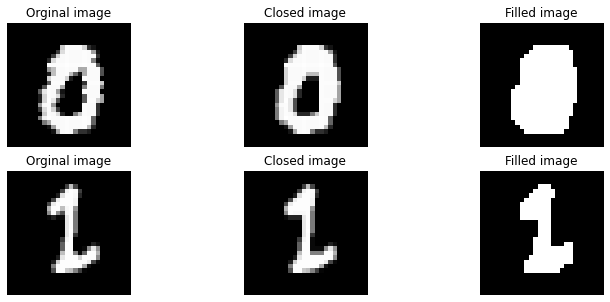

In [7]:
# Plot images
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
for ax, im, nm in zip(axes[0], [z_im, z_im_close, mask_zero], ["Orginal image", "Closed image", "Filled image"]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], [o_im, o_im_close, mask_one], ["Orginal image", "Closed image", "Filled image"]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

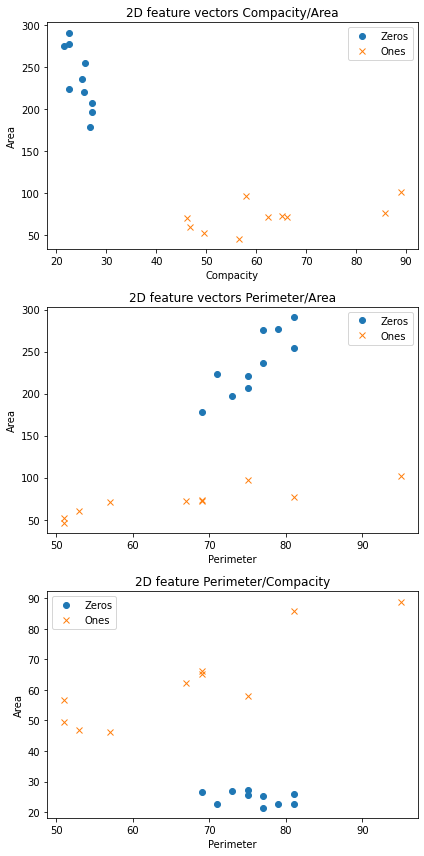

In [17]:

fig, ax = plt.subplots(3, 1, figsize=(6, 12))
ax[0].plot(ZERO_COMPACITY, ZERO_AREAS, "o",ONE_COMPACITY, ONE_AREAS, "x" )
ax[0].set_title('2D feature vectors Compacity/Area')
ax[0].set_ylabel('Area');
ax[0].set_xlabel('Compacity');
ax[0].legend(['Zeros', 'Ones'])

ax[1].plot(ZERO_PERIMETER, ZERO_AREAS, "o",ONE_PERIMETER, ONE_AREAS, "x" )
ax[1].set_title('2D feature vectors Perimeter/Area')
ax[1].set_ylabel('Area');
ax[1].set_xlabel('Perimeter');
ax[1].legend(['Zeros', 'Ones'])

ax[2].plot(ZERO_PERIMETER, ZERO_COMPACITY, str("o"),ONE_PERIMETER, ONE_COMPACITY, "x")
ax[2].set_title('2D feature Perimeter/Compacity')
ax[2].set_ylabel('Area');
ax[2].set_xlabel('Perimeter');
ax[2].legend(['Zeros', 'Ones'])


fig.tight_layout()


From the plots above we note that all the 2D feature vectors allow for classifying accurately both digits. That is, we can trace a line that separates both labels.

It is important to note that the algorithm used is successfull because we have an apriori idea of what needs to be classfied. That is, we know that for a given size of digit 0&1, a filled zero will have a greater area

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

In [ ]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

In [ ]:
# Add your implementation and discussion